<a href="https://colab.research.google.com/github/Abhishekyes/Employee-Company-Relationship/blob/main/emp_comp_relation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
!wget https://raw.githubusercontent.com/gauravpks/ml-repo/master/HRDS/unit1.csv

--2021-11-27 15:48:46--  https://raw.githubusercontent.com/gauravpks/ml-repo/master/HRDS/unit1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 633626 (619K) [text/plain]
Saving to: ‘unit1.csv’

unit1.csv           100%[===================>] 618.78K  --.-KB/s    in 0.04s   

2021-11-27 15:48:47 (13.8 MB/s) - ‘unit1.csv’ saved [633626/633626]



In [ ]:
u1 = pd.read_csv('unit1.csv')
u1.head(4)

,Employee ID,Data Effective Date,Employee\nStatus\n,"Career Level \n(1=lowest, 6=highest)\n",Hired Date,Hired in FY\n(Yes/No),Termination Date,Terminated\nin FY\n(Yes/No),Termination Type\n(Voluntary or Involuntary Exit),Job Start Date,Promoted\nin FY\n(Yes/No),Birth Date,Age\n(Years),Tenure\n(Years),Time in\nJob (Years),Rating,Education\n(Highest\nDegree)
0,A0001,31-12-2016,Active,1,12-09-2016,Yes,NaN,No,NaN,12-09-2016,NaN,21-09-1992,NaN,NaN,NaN,At Target,BA/BS
1,A0002,31-12-2016,Active,1,19-04-2016,Yes,NaN,No,NaN,19-04-2016,NaN,16-11-1993,NaN,NaN,NaN,At Target,BA/BS
2,A0003,31-12-2016,Active,1,14-03-2016,Yes,NaN,No,NaN,14-03-2016,NaN,26-11-1993,NaN,NaN,NaN,At Target,MA/MS
3,A0004,31-12-2016,Active,1,12-09-2016,Yes,NaN,No,NaN,12-09-2016,NaN,28-03-1993,NaN,NaN,NaN,At Target,BA/BS


In [ ]:
u1.info()

In [ ]:
u1.rename(columns ={'Employee\nStatus\n':'Employee Status','Career Level \n(1=lowest, 6=highest)\n':'Career Level',
                   'Hired in FY\n(Yes/No)':'Hired in FY','Terminated\nin FY\n(Yes/No)':'Terminated',
                   'Termination Type\n(Voluntary or Involuntary Exit)':'Termination Type','Promoted\nin FY\n(Yes/No)':'Promoted',
                   'Age\n(Years)':'Age','Tenure\n(Years)':'Tenure','Time in\nJob (Years)':'Time in Job',
                   'Education\n(Highest\nDegree)':'Education'},inplace = True)
u1.head()


In [ ]:
u1['Data Effective Date'] = pd.to_datetime(u1['Data Effective Date'])
u1['Hired Date'] = pd.to_datetime(u1['Hired Date'])
u1['Job Start Date'] = pd.to_datetime(u1['Job Start Date'])
u1['Birth Date'] = pd.to_datetime(u1['Birth Date'])
u1['Termination Date'] = pd.to_datetime(u1['Termination Date'])

In [ ]:
u1['Age'] = (u1['Data Effective Date'].apply(lambda x :x.year) - u1['Birth Date'].apply(lambda x :x.year))
u1.head()

In [ ]:
u1['Tenure'] = (u1['Data Effective Date'].apply(lambda x:x.year) - u1['Hired Date'].apply(lambda x:x.year))
u1['Time in Job'] = (u1['Data Effective Date'].apply(lambda x:x.year) - u1['Job Start Date'].apply(lambda x:x.year))

In [ ]:
u1.head(703)

In [ ]:
u1 = u1.drop([4322,702])

In [ ]:
age_cnt = u1['Age'].value_counts()

In [ ]:
age_cnt

In [ ]:
def agegrp(x):
  if x<= 20:
    group = 'below 20'
  elif x>=21 and x<= 30:
    group = '21-30'
  elif x>=31 and x<=40:
    group = '31-40'
  elif x>=41 and x<=50:
    group = '41-50'
  elif x>=51 and x<=60:
    group = '51-60'
  elif x>=61:
    group = 'above 61'

  return group

In [ ]:
u1['Age Group'] = u1['Age'].apply(agegrp)
u1.head(2)

In [ ]:
agegrp_cnt = np.round(u1['Age Group'].value_counts(normalize = True)*100)
agegrp_cnt

In [ ]:
plt.figure(figsize = (18,8))
plt.bar(agegrp_cnt.keys().values,agegrp_cnt,color = 'green',width =0.5)
plt.xlabel('Age group', fontweight = 'bold')
plt.ylabel('percent of people',fontweight = 'bold')
plt.title('age group');

In [ ]:
actv_count = u1[u1['Employee Status'] == 'Active']
actv_count

In [ ]:
termin_count = u1[u1['Employee Status'] == 'Terminated']
termin_count

## **Active people EDA**

In [ ]:
crlvl_act_cnt = np.round(actv_count['Career Level'].value_counts(normalize =True)*100)
crlvl_act_cnt

3    20.0
4    19.0
2    19.0
5    15.0
1    15.0
6    13.0
Name: Career Level, dtype: float64

In [ ]:
plt.figure(figsize=(18,8))
plt.bar(crlvl_act_cnt.keys().values,crlvl_act_cnt,color = 'red',width =0.5)
plt.xlabel('career lvl',fontweight = 'bold')
plt.ylabel('percentage of people', fontweight = 'bold')
plt.title('Active people aaccording to their career level');

In [ ]:
age_act_cnt = actv_count['Age'].value_counts()
age_act_cnt

In [ ]:
agegrp_act_cnt = np.round(actv_count['Age Group'].value_counts(normalize = True)*100,2)
agegrp_act_cnt

21-30    48.51
31-40    32.00
41-50    13.21
51-60     6.27
Name: Age Group, dtype: float64

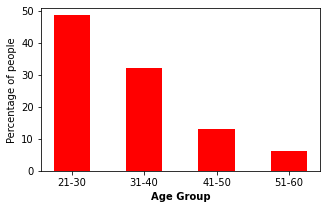

In [ ]:
plt.figure(figsize = (5,3))
plt.bar(agegrp_act_cnt.keys().values,agegrp_act_cnt,color = 'red',width =0.5)
plt.xlabel('Age Group',fontweight = 'bold')
plt.ylabel('Percentage of people');

In [ ]:
actv_count.head(2)

,Employee ID,Data Effective Date,Employee Status,Career Level,Hired Date,Hired in FY,Termination Date,Terminated,Termination Type,Job Start Date,Promoted,Birth Date,Age,Tenure,Time in Job,Rating,Education,Age Group
0,A0001,2016-12-31,Active,1,2016-12-09,Yes,NaT,No,NaN,2016-12-09,NaN,1992-09-21,24,0,0,At Target,BA/BS,21-30
1,A0002,2016-12-31,Active,1,2016-04-19,Yes,NaT,No,NaN,2016-04-19,NaN,1993-11-16,23,0,0,At Target,BA/BS,21-30


In [ ]:
actv_count['Education'].value_counts()

BA/BS    3398
MA/MS    1208
MBA      1152
PhD        91
JD         69
Name: Education, dtype: int64

In [ ]:
edu_act_cnt = np.round(actv_count['Education'].value_counts(normalize = True)*100,2)
edu_act_cnt

BA/BS    57.42
MA/MS    20.41
MBA      19.47
PhD       1.54
JD        1.17
Name: Education, dtype: float64

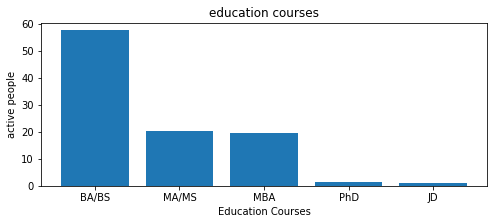

In [ ]:
plt.figure(figsize =(8,3))
plt.bar(edu_act_cnt.keys().values,edu_act_cnt,width = 0.8)
plt.xlabel('Education Courses')
plt.ylabel('active people')
plt.title('education courses');

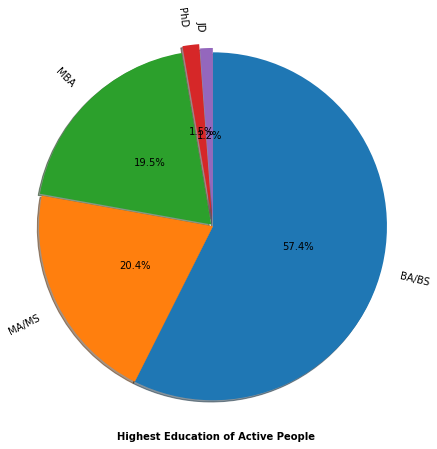

In [ ]:
plt.pie(edu_act_cnt.values,labels = edu_act_cnt.keys().values,explode= (0,0,0.03,0.1,0.05),autopct= '%.1f%%',startangle = 90,counterclock= False,
        pctdistance = 0.5,shadow = True,radius = 2,rotatelabels = True,frame = False)
plt.xlabel('\n\n\n\n\n\n\n\n  Highest Education of Active People',fontweight = 'bold');

In [ ]:
actv_count.head(2)

,Employee ID,Data Effective Date,Employee Status,Career Level,Hired Date,Hired in FY,Termination Date,Terminated,Termination Type,Job Start Date,Promoted,Birth Date,Age,Tenure,Time in Job,Rating,Education,Age Group
0,A0001,2016-12-31,Active,1,2016-12-09,Yes,NaT,No,NaN,2016-12-09,NaN,1992-09-21,24,0,0,At Target,BA/BS,21-30
1,A0002,2016-12-31,Active,1,2016-04-19,Yes,NaT,No,NaN,2016-04-19,NaN,1993-11-16,23,0,0,At Target,BA/BS,21-30


In [ ]:
rtng_act_cnt = np.round(actv_count['Rating'].value_counts(normalize =True)*100,2)
rtng_act_cnt

Above Target                  47.77
At Target                     41.33
Below Target                   5.61
Significantly Above Target     5.20
Significantly Below Target     0.08
Name: Rating, dtype: float64

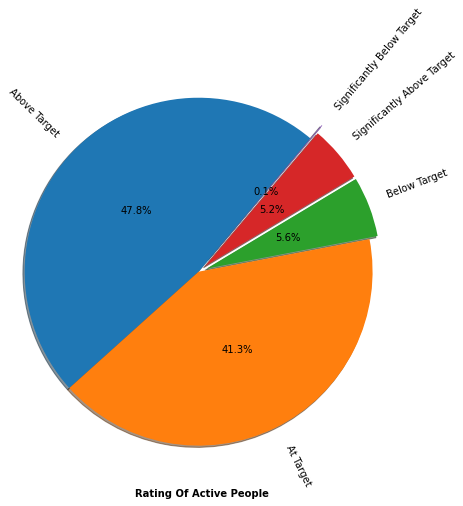

In [ ]:
plt.pie(rtng_act_cnt.values,radius=2,labels = rtng_act_cnt.keys().values,
        explode= (0,0,0.1,0.1,0.2),autopct = '%.1f%%',
        startangle = 50,pctdistance= 0.5,shadow=True,
        counterclock = True,frame = False,rotatelabels= True)
plt.xlabel('\n\n\n\n\n\n\n\n\n  Rating Of Active People',fontweight = 'bold');

Text(0.5, 1.0, 'Rating of active people')

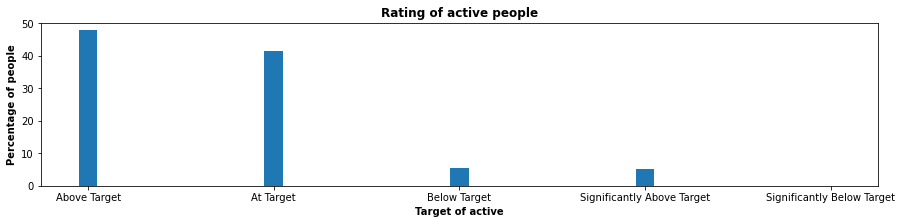

In [ ]:
plt.figure(figsize = (15,3))
plt.bar(rtng_act_cnt.keys().values,rtng_act_cnt.values,width = 0.1)
plt.xlabel('Target of active', fontweight = 'bold')
plt.ylabel('Percentage of people', fontweight= 'bold')
plt.title('Rating of active people', fontweight = 'bold')

In [ ]:
actv_count.head(2)

,Employee ID,Data Effective Date,Employee Status,Career Level,Hired Date,Hired in FY,Termination Date,Terminated,Termination Type,Job Start Date,Promoted,Birth Date,Age,Tenure,Time in Job,Rating,Education,Age Group
0,A0001,2016-12-31,Active,1,2016-12-09,Yes,NaT,No,NaN,2016-12-09,NaN,1992-09-21,24,0,0,At Target,BA/BS,21-30
1,A0002,2016-12-31,Active,1,2016-04-19,Yes,NaT,No,NaN,2016-04-19,NaN,1993-11-16,23,0,0,At Target,BA/BS,21-30


In [ ]:
actv_count['Promoted'].value_counts()

No     4054
Yes     965
Name: Promoted, dtype: int64

In [ ]:
prmt_act_cnt = actv_count['Promoted'].value_counts()
prmt_act_cnt

No     4054
Yes     965
Name: Promoted, dtype: int64

In [ ]:
prmt_act_cnt.keys().values

array(['No', 'Yes'], dtype=object)

Text(0.5, 0, '\n\n\n\n\n\n Promotion of Active People')

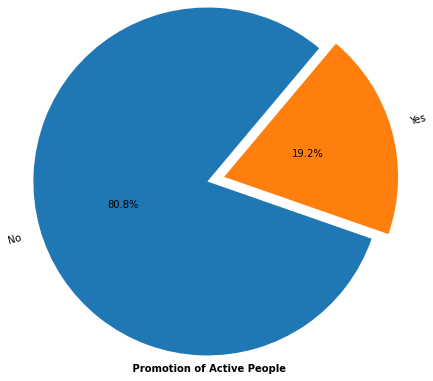

In [ ]:
plt.pie(prmt_act_cnt.values,radius= 2 , labels= prmt_act_cnt.keys().values,autopct= '%.1f%%'
         ,pctdistance =0.5,shadow = False,startangle = 50,counterclock = True,
        rotatelabels = True,explode = (0,0.2))
plt.xlabel('\n\n\n\n\n\n Promotion of Active People',fontweight = 'bold')

##**Terminated people EDA**

In [ ]:
crlvl_ter_cnt = np.round(termin_count['Career Level'].value_counts(normalize = True)*100,2)
crlvl_ter_cnt

1    33.09
2    26.96
3    22.79
4    10.78
5     4.41
6     1.96
Name: Career Level, dtype: float64

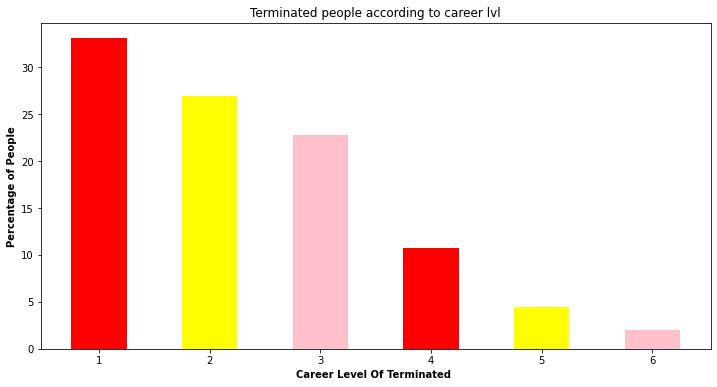

In [ ]:
plt.figure(figsize = (12,6))
plt.bar(crlvl_ter_cnt.keys().values,crlvl_ter_cnt,color = ('red','yellow','pink'),width = 0.5)
plt.xlabel('Career Level Of Terminated ', fontweight = 'bold')
plt.ylabel('Percentage of People',fontweight = 'bold')
plt.title('Terminated people according to career lvl');

Text(0.5, 0, '\n\n\n\n\n\n\n  Terminated People according to career')

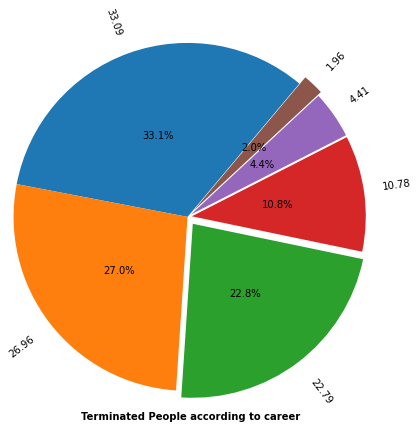

In [ ]:
plt.pie(crlvl_ter_cnt.values,radius =2, labels = crlvl_ter_cnt.values,autopct = '%.1f%%',
        pctdistance = 0.5,shadow = False,startangle = 50,rotatelabels = True,
        explode = (0,0,0.1,0.05,0.05,0.1))
plt.xlabel('\n\n\n\n\n\n\n  Terminated People according to career', fontweight = 'bold')

In [ ]:
agegrp_ter_cnt = np.round(termin_count['Age Group'].value_counts(normalize = True)*100,2)
agegrp_ter_cnt

21-30       74.51
31-40       20.59
41-50        2.94
51-60        1.72
above 61     0.25
Name: Age Group, dtype: float64

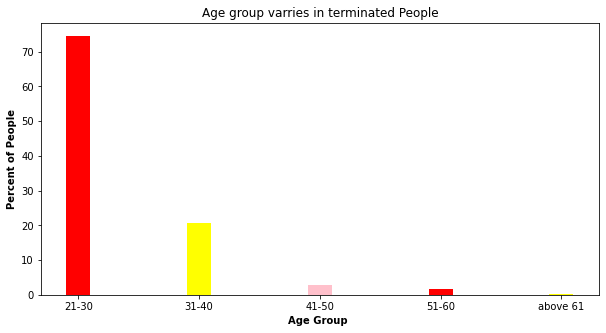

In [ ]:
plt.figure(figsize= (10,5))
plt.bar(agegrp_ter_cnt.keys().values,agegrp_ter_cnt,color = ('red','yellow','pink'),width = 0.2)
plt.xlabel('Age Group ',fontweight = 'bold')
plt.ylabel('Percent of People',fontweight = 'bold')
plt.title('Age group varries in terminated People');

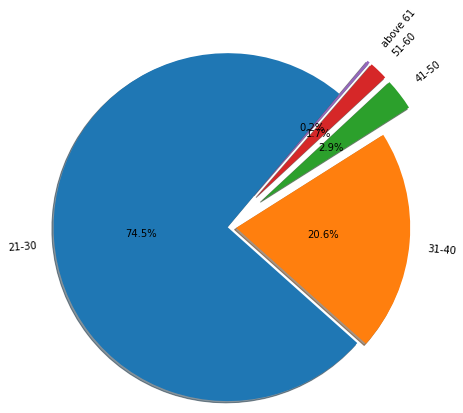

In [ ]:
plt.pie(agegrp_ter_cnt.values,radius = 2, labels = agegrp_ter_cnt.keys().values,autopct = '%.1f%%',pctdistance = 0.5,
        startangle = 50,rotatelabels = True, shadow = True, counterclock = True,explode = (0,0.1,0.5,0.5,0.5));

In [ ]:
edu_ter_cnt = np.round(termin_count['Education'].value_counts(normalize =True)*100,2)
edu_ter_cnt

BA/BS    70.83
MA/MS    15.69
MBA      12.50
PhD       0.74
JD        0.25
Name: Education, dtype: float64

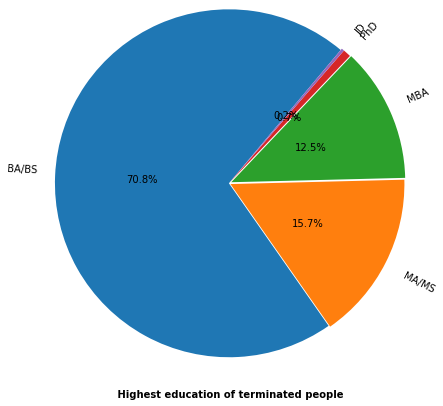

In [ ]:
plt.pie(edu_ter_cnt.values, radius = 2,labels = edu_ter_cnt.keys().values,autopct = '%.1f%%',
        pctdistance = 0.5,rotatelabels =True,startangle = 50, explode = (0,0.02,0.03,0.02,0.02))
plt.xlabel('\n\n\n\n\n\n\n\n Highest education of terminated people',fontweight = 'bold');

In [ ]:
rtng_ter_cnt = np.round(termin_count['Rating'].value_counts(normalize = True)*100,2)
rtng_act_cnt

Above Target                  47.77
At Target                     41.33
Below Target                   5.61
Significantly Above Target     5.20
Significantly Below Target     0.08
Name: Rating, dtype: float64

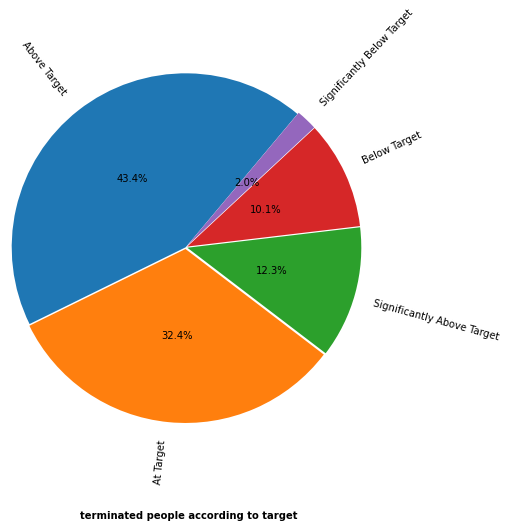

In [ ]:
plt.pie(rtng_ter_cnt.values,radius = 2,labels= rtng_ter_cnt.keys().values,autopct = '%.1f%%',pctdistance = 0.5,
        rotatelabels =True,startangle = 50,explode = (0,0.02,0.02,0.02,0.02))
plt.xlabel('\n\n\n\n\n\n\n\n\n\n\n\n\n  terminated people according to target', fontweight = 'bold');

In [ ]:
tertyp_cnt = termin_count['Termination Type'].value_counts()
tertyp_cnt

Voluntary Exit      323
Involuntary Exit     85
Name: Termination Type, dtype: int64

Text(0.5, 0, '\n\n\n\n\n\n\n Termination type')

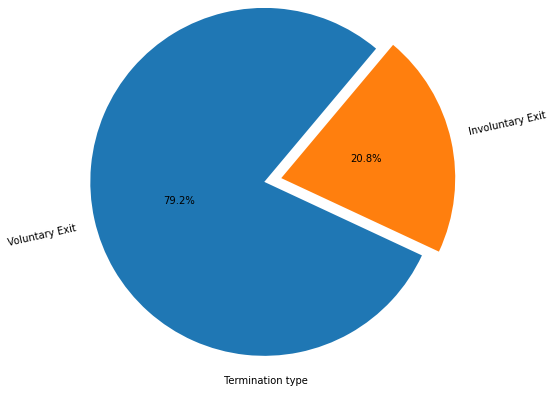

In [ ]:
plt.pie(tertyp_cnt.values,radius = 2, labels =tertyp_cnt.keys().values,explode = (0,0.2),
        autopct = '%.1f%%',pctdistance = 0.5,rotatelabels = True,startangle = 50)
plt.xlabel('\n\n\n\n\n\n\n Termination type')

In [ ]:
u1.head(2)

,Employee ID,Data Effective Date,Employee Status,Career Level,Hired Date,Hired in FY,Termination Date,Terminated,Termination Type,Job Start Date,Promoted,Birth Date,Age,Tenure,Time in Job,Rating,Education,Age Group
0,A0001,2016-12-31,Active,1,2016-12-09,Yes,NaT,No,NaN,2016-12-09,NaN,1992-09-21,24,0,0,At Target,BA/BS,21-30
1,A0002,2016-12-31,Active,1,2016-04-19,Yes,NaT,No,NaN,2016-04-19,NaN,1993-11-16,23,0,0,At Target,BA/BS,21-30


In [ ]:
u1[['Tenure', 'Time in Job']]

,Tenure,Time in Job
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
6323,35,12
6324,36,11
6325,25,11
6326,36,12


In [ ]:
prcnt = lambda x: np.round(x/x.sum()*100)
tm_dif_cnt = u1.groupby(['Tenure','Time in Job'])['Tenure'].count().unstack().apply(prcnt, axis = 1)
tm_dif_cnt.head(2)

Time in Job,0,1,2,3,4,5,6,7,8,9,10,11,12
Tenure,,,,,,,,,,,,,
0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
